In [2]:
import os
import numpy as np
import glob
import nibabel as nib
import matplotlib.pyplot as plt
import zc_function_list as ff
font1 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 19,}

In [19]:
raw_folder = '/Volumes/McVeighLab/projects/Zhennong/AUH_patients/nii_files'
smooth_folder = '/Volumes/McVeighLab/projects/Zhennong/AUH_patients/nii_files_smooth'
image = ff.find_all_target_files(['96/*post/0.nii.gz'],raw_folder)
print(image)

['/Volumes/McVeighLab/projects/Zhennong/AUH_patients/nii_files/96/96post/0.nii.gz']


In [20]:
volume = nib.load(image[0])
volume_data = volume.get_fdata()

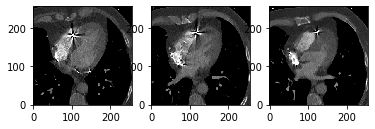

In [21]:
# make a slice show of the image
slice1 = ff.set_window(volume_data[:,:,80],300,600)
slice2 = ff.set_window(volume_data[:,:,100],300,600)
slice3 = ff.set_window(volume_data[:,:,110],300,600)
ff.show_slices([slice1,slice2,slice3])

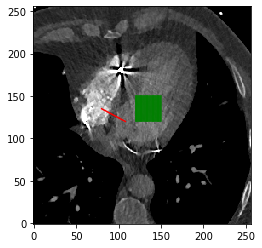

In [33]:
# plot the graph to show the ROI 
slice_num = 80
I = volume_data[:,:,80]


xrange = [120,151];yrange = [120,151]
x_range = np.arange(xrange[0],xrange[1],1)
y_range = np.arange(yrange[0],yrange[1],1)
xgrid,ygrid = np.meshgrid(x_range,y_range)

end = [108,120]
start = [80,135]

fig = plt.figure(1, figsize=(5, 5))
%matplotlib inline
plt.imshow(ff.set_window(I,300,600).T,cmap='gray',origin='lower')
plt.plot(xgrid,ygrid,color = 'green')
plt.plot([start[0],end[0]],[start[1],end[1]],color = 'red')


plt.savefig('graph for 96_post_raw.eps')

In [35]:
# obtain SNR and CNR
snr,_ = ff.check_SNR(I,xrange,yrange,'SNR')
print(snr)
cnr,info = ff.check_SNR(I,xrange,yrange,'CNR')
print(cnr,info)

8.758924743809542
7.319958535897975 [420.0, 69.0, 231.2299687825182, 47.951091290839]


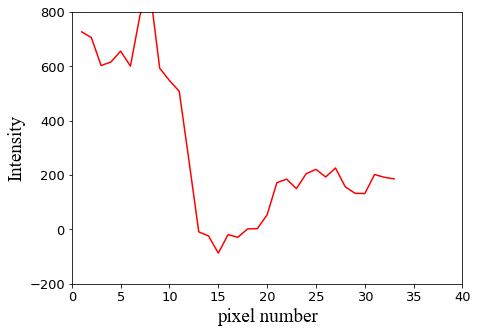

In [36]:
# plot linear profile
profile,pixel_list = ff.linear_profile(I,start,end)
fig = plt.figure(1, figsize=(7, 5))

plt.plot(pixel_list,profile,color = 'red')
plt.tick_params(labelsize=13)
plt.xlabel("pixel number",fontdict = font1)
plt.ylabel("Intensity",fontdict = font1)
plt.ylim([-200,800])
plt.xlim([0,40])
fig.savefig('linear profile_108_post_0.6.eps',format = 'eps')

## Trial code

In [8]:
# function to check SNR
def check_SNR(image,xrange,yrange,calculate_type = 'SNR'):
    assert len(image.shape) == 2
    assert len(xrange) == 2
    assert len(yrange) == 2
    
    x_range = np.arange(xrange[0],xrange[1],1)
    y_range = np.arange(yrange[0],yrange[1],1)
    xgrid,ygrid = np.meshgrid(x_range,y_range)
    intensity_list = []
    for i in range(0,xgrid.shape[0]):
        for j in range(0,xgrid.shape[1]):
            intensity_list.append(I[xgrid[i,j],ygrid[i,j]])
    intensity_list = np.asarray(intensity_list)
    peak = np.max(intensity_list)
    bottom = np.min(intensity_list)
    mean = np.mean(intensity_list)
    std = np.std(intensity_list)
    info = [peak,bottom,mean,std]
    if calculate_type == 'SNR':
        ans = peak / std
    elif calculate_type == 'CNR':
        ans = (peak - bottom) / std
    else:
        raise ValueError("Wrong calculate type")
    return ans,info  

In [11]:
snr,_ = check_SNR(I,[150,191],[110,151],'CNR')
print(snr)

5.912735592980067


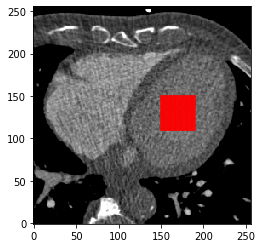

In [6]:
I = volume_data[:,:,80]
xrange = np.arange(150,191,1)
yrange = np.arange(110,151,1)
xgrid,ygrid = np.meshgrid(xrange,yrange)

fig = plt.figure(1, figsize=(5, 5))
%matplotlib inline
plt.imshow(slice1.T,cmap='gray',origin='lower')
plt.plot(xgrid,ygrid,color = 'red')
plt.show()

In [7]:
intensity_list = []
for i in range(0,xgrid.shape[0]):
    for j in range(0,xgrid.shape[1]):
        intensity_list.append(I[xgrid[i,j],ygrid[i,j]])
intensity_list = np.asarray(intensity_list)
peak = np.max(intensity_list)
bottom = np.min(intensity_list)
mean = np.mean(intensity_list)
std = np.std(intensity_list)
print(peak,bottom,mean,std)

404.0 -2.0 199.25520523497917 68.66534003009133


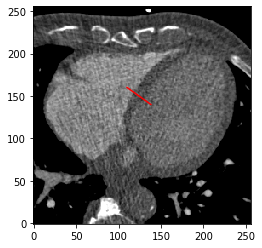

In [28]:
I = volume_data[:,:,80]
x = [138,110]
y = [140,160]


fig = plt.figure(1, figsize=(5, 5))
%matplotlib inline
plt.imshow(slice1.T,cmap='gray',origin='lower')
plt.plot(x,y,color = 'red')
plt.show()

In [35]:
end = np.asarray([138,140])
start = np.asarray([110,160])
vector = ff.normalize(end - start)
profile = []
count = 1
while 1 == 1:
    point = (start + vector * (count - 1))
    profile.append(I[int(point[0]),int(point[1])])
    if (point[0]>end[0] and vector[0] >=0) or (point[0]<end[0] and vector[0] <0):
        if (point[1]>end[1] and vector[1] >=0) or (point[1]<end[1] and vector[1] <0):
            break
    count += 1
profile = np.asarray(profile)
pixel_list = np.arange(1,count+1,1)

In [37]:
def linear_profile(image,start,end):
    start = np.asarray(start)
    end = np.asarray(end)
    vector = ff.normalize(end - start)
    profile = []
    count = 1
    while 1 == 1:
        point = (start + vector * (count - 1))
        profile.append(I[int(point[0]),int(point[1])])
        if (point[0]>end[0] and vector[0] >=0) or (point[0]<end[0] and vector[0] <0):
            if (point[1]>end[1] and vector[1] >=0) or (point[1]<end[1] and vector[1] <0):
                break
        count += 1
    profile = np.asarray(profile)
    pixel_list = np.arange(1,count+1,1)
    return profile,pixel_list
    

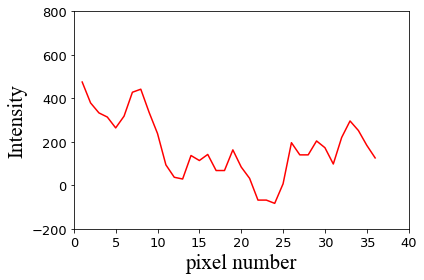

In [10]:
profile1,pixel_list1 = ff.linear_profile(I,[110,160],[138,140])
fig = plt.figure(1, figsize=(6, 6))
%matplotlib inline
plt.plot(pixel_list1,profile1,color = 'red')
plt.tick_params(labelsize=13)
plt.xlabel("pixel number",fontdict = font1)
plt.ylabel("Intensity",fontdict = font1)
plt.ylim([-200,800])
plt.xlim([0,40])
plt.show()